In [91]:
#Importamos las librerías a utilizar
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import numpy as np
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

#Importamos los 2 data sources y los unimos en un único dataframe utilizando el order id
csv1 = pd.read_csv('https://raw.githubusercontent.com/eliasguillermo/ds-ecommerce/master/datatable%201.csv', sep = ';', decimal=',', low_memory=False)
csv2 = pd.read_csv('https://raw.githubusercontent.com/eliasguillermo/ds-ecommerce/master/datatable%202.csv', sep = ';', decimal=',')
df = pd.merge(csv1, csv2, on="ecomm_order_id", how="inner")

pd.set_option('display.max_columns', None)
df.head()

,ecomm_order_id,ecommerce,store,ecomm_creation_date_x,numero_lote,fecha_facturado,linea,marca,vArticulo_id,vTalle_Codigo,producto,quantity,client_price,PrecioCosto,ecomm_tipo_envio,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular,ecomm_transporte_nombre,sucursal_original,ultima_sucursal,ColorPrimario,ProveedorId,Disciplina,Genero,description,ecomm_creation_date_y,date_handling,date_invoiced,email,adress_id,latitude,longitude,payment
0,1100030631314-01,vtex,Dash,2021-01-01 03:10:27.000,8851.0,2021-01-04 15:04:11.400,INDUMENTARIA,ADIDAS FUTBOL,266-0971,XL *,CAMPERA ADIDAS RIVER PLATE 20/21 266-0971-XL,1,9999.0,5366.46,residential,6439.30,11999.0,Envio a domicilio Estándar,NaN,NaN,GRIS ...,FQ7691,FUTBOL,HOMBRE ...,vtex,2021-01-01 00:10:27,2021-01-01 00:31:02,2021-01-04 15:12:03,1027da2f210a4469885a6f4e8590d1e1@ct.vtex.com.br,4828411093815,-56.853599548339844,-27.50750160217285,MercadoPago
1,1100040613312-01,vtex,Grid,2021-01-01 01:10:06.000,8851.0,2021-01-04 15:35:05.970,CALZADO ADULTOS,NIKE,306-6695,11 *,ZAPATILLAS JORDAN AIR MAX 200 306-6695-11.0,1,15999.0,8420.53,residential,8420.53,11799.0,Envio a domicilio Estándar,NaN,NaN,BLANCO,CD6105-100,BASKET,HOMBRE ...,vtex,2021-01-01 01:10:06,2021-01-01 01:36:02,2021-01-04 15:43:02,21a3d349322a49f78fe19cd12a6b723c@ct.vtex.com.br,4828421937843,-67.82970428466797,-38.97628402709961,MercadoPago
2,1100043415822-01,vtex,Grid,2021-01-01 03:56:54.000,8851.0,2021-01-04 15:36:03.567,CALZADO ADULTOS,NIKE,306-6997,10.5,BOTITAS JORDAN AIR 6 RETRO 306-6997-10.5,1,19199.2,12631.05,residential,12631.05,16499.0,Envio a domicilio Estándar,NaN,NaN,NEGRO,CT8529-062,BASKET,NIÑOS,vtex,2021-01-01 00:56:54,2021-01-01 01:21:03,2021-01-04 15:45:06,02d8f6f774044c66bdf6c39cab165db9@ct.vtex.com.br,4779119470893,-58.59366226196289,-34.58610153198242,MercadoPago
3,1100043415822-01,vtex,Grid,2021-01-01 03:56:54.000,8851.0,2021-01-04 15:36:03.567,CALZADO ADULTOS,NIKE,306-6997,13 *,BOTITAS JORDAN AIR 6 RETRO 306-6997-13.0,1,19199.2,12631.05,residential,12631.05,16499.0,Envio a domicilio Estándar,NaN,NaN,NEGRO,CT8529-062,BASKET,NIÑOS,vtex,2021-01-01 00:56:54,2021-01-01 01:21:03,2021-01-04 15:45:06,02d8f6f774044c66bdf6c39cab165db9@ct.vtex.com.br,4779119470893,-58.59366226196289,-34.58610153198242,MercadoPago
4,1100071553744-01,vtex,Grid,2021-01-01 07:25:43.000,8851.0,2021-01-04 15:36:32.500,CALZADO ADULTOS,NIKE,306-6997,13 *,BOTITAS JORDAN AIR 6 RETRO 306-6997-13.0,1,23999.0,12631.05,residential,12631.05,16499.0,Envio a domicilio Estándar,NaN,NaN,NEGRO,CT8529-062,BASKET,NIÑOS,vtex,2021-01-01 04:25:43,2021-01-01 04:46:02,2021-01-04 15:42:22,4ca574a0012b40aa89676a2dd4f928a4@ct.vtex.com.br,4828456959747,-58.38155746459961,-34.60368347167969,creditCard


In [92]:
#Vistazo general de info del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34227 entries, 0 to 34226
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecomm_order_id                34227 non-null  object 
 1   ecommerce                     34227 non-null  object 
 2   store                         34227 non-null  object 
 3   ecomm_creation_date_x         34227 non-null  object 
 4   numero_lote                   34222 non-null  float64
 5   fecha_facturado               33401 non-null  object 
 6   linea                         34002 non-null  object 
 7   marca                         34002 non-null  object 
 8   vArticulo_id                  34220 non-null  object 
 9   vTalle_Codigo                 34226 non-null  object 
 10  producto                      34227 non-null  object 
 11  quantity                      34227 non-null  int64  
 12  client_price                  34216 non-null  float64
 13  P

Eliminaremos las siguientes columnas ya que no serán de utilidad para el análisis:
- numero_lote: no propociona información útil
- fecha_facturado: contiene la misma información que date_invoiced (con minutos de diferencia), pero menos cantidad de registros
- PrecioCosto: Debería contener la misma información que VArticuloTalle_Costo. Nos quedamos con la segunda porque tiene mayor cantidad de registros
- sucursal_original: contiene muy pocos datos (count = 2058)
- ultima_sucursal: contiene muy pocos datos (count = 15)
- description: es la descripción del ecommerce, o sea que contiene la misma información que el campo "ecommerce"
- ecomm_creation_date_y: es la misma fecha que ecomm_creation_date_x, quedó duplicada al unir los 2 data sources
- ecomm_tipo_envio: No proporciona información útil

In [93]:
#Eliminamos las columnas que no vamos a usar
df.drop(['numero_lote', 'fecha_facturado', 'PrecioCosto','sucursal_original','ultima_sucursal','description','ecomm_creation_date_y','ecomm_tipo_envio'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34227 entries, 0 to 34226
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ecomm_order_id                34227 non-null  object 
 1   ecommerce                     34227 non-null  object 
 2   store                         34227 non-null  object 
 3   ecomm_creation_date_x         34227 non-null  object 
 4   linea                         34002 non-null  object 
 5   marca                         34002 non-null  object 
 6   vArticulo_id                  34220 non-null  object 
 7   vTalle_Codigo                 34226 non-null  object 
 8   producto                      34227 non-null  object 
 9   quantity                      34227 non-null  int64  
 10  client_price                  34216 non-null  float64
 11  VArticuloTalle_Costo          34002 non-null  float64
 12  VArticuloTalle_PrecioRegular  34002 non-null  float64
 13  e

In [94]:
#Vistazo general de medidas descriptivas de variables cuantitativas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity,34227.0,1.023578,0.863330,1.0,1.00,1.0,1.0,150.00
client_price,34216.0,6962.285159,4454.865692,-1199.8,4399.00,5999.0,8499.0,27999.00
VArticuloTalle_Costo,34002.0,4399.160440,2701.885164,0.1,2788.95,3894.2,5366.0,17894.21
VArticuloTalle_PrecioRegular,34002.0,7702.422613,5034.962761,29.0,4499.00,6590.0,9199.0,33999.00


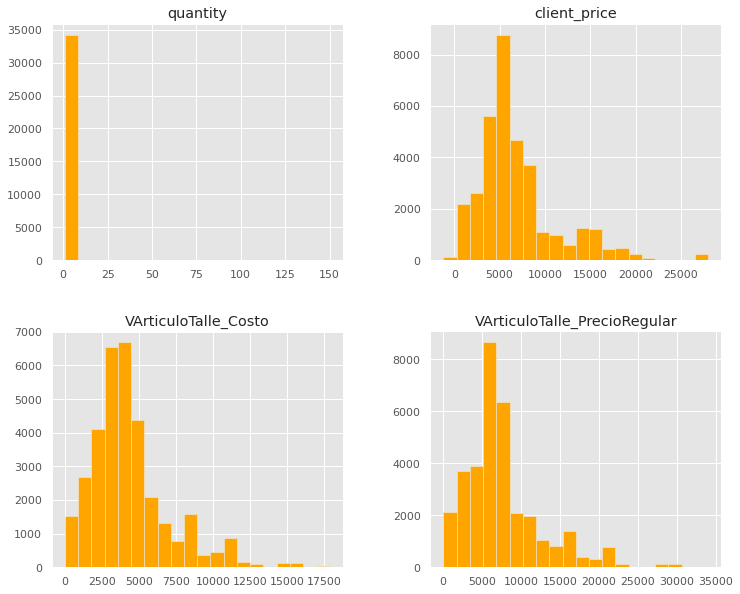

In [95]:
# Histogramas de variables cuantitativas
df.hist(figsize=(12,10), color='orange', bins=20)
plt.show()

Se puede notar que client_price tiene valores negativos, lo cual no tiene sentido y constituye un error de carga en los datos.
Vamos a eliminar esos registros para que no afecten el análisis.

In [96]:
#Eliminamos los registros con precios negativos
df = df.drop(df[df['client_price'] < 0].index)
df[df['client_price'] < 0]

,ecomm_order_id,ecommerce,store,ecomm_creation_date_x,linea,marca,vArticulo_id,vTalle_Codigo,producto,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular,ecomm_transporte_nombre,ColorPrimario,ProveedorId,Disciplina,Genero,date_handling,date_invoiced,email,adress_id,latitude,longitude,payment


In [97]:
#Análisis particular de la variable "client_price"
variable = 'client_price'

minimo = df[variable].min()
maximo = df[variable].max()
media = df[variable].mean()
mediana = df[variable].median()
moda = df[variable].mode()[0]
stdev = df[variable].std()
varian = df[variable].var()

print('Minimo: ' + str(minimo))
print('Maximo: ' + str(maximo))
print('Media: ' + str(round(media,2)))
print('Mediana: ' + str(mediana))
print('Moda: ' + str(moda))
print('Desviación estándar: ' + str(round(stdev,2)))
print('Varianza: ' + str(round(varian,2)))

Minimo: 0.0
Maximo: 27999.0
Media: 6962.76
Mediana: 5999.0
Moda: 5999.0
Desviación estándar: 4454.56
Varianza: 19843093.83


<Figure size 720x648 with 0 Axes>

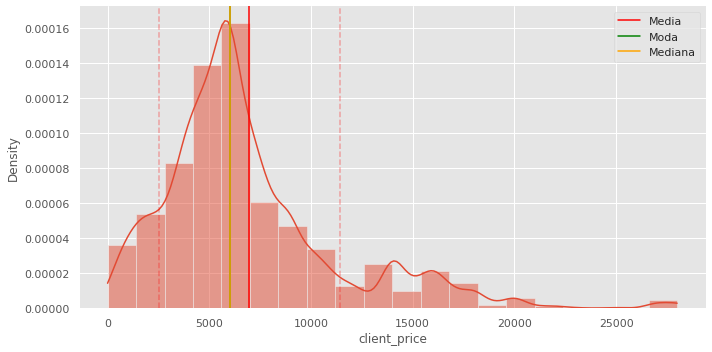

In [98]:
#Histograma y curva de densidad de client_price con media, mediana y moda
plt.figure(figsize=(10, 9))
ax = sns.displot(data=df, 
                 x = variable, 
                 kde=True,
                stat="density",
                height=5,
                aspect=2,
                bins = 20)

plt.axvline(media,
           color = "red",
           label = 'Media')

plt.axvline(media - stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(media + stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(moda,
           color = "green",
           alpha = 1,
           label = 'Moda')

plt.axvline(mediana,
           color = "orange",
           alpha = 1,
           label = 'Mediana')

plt.legend()

plt.show()

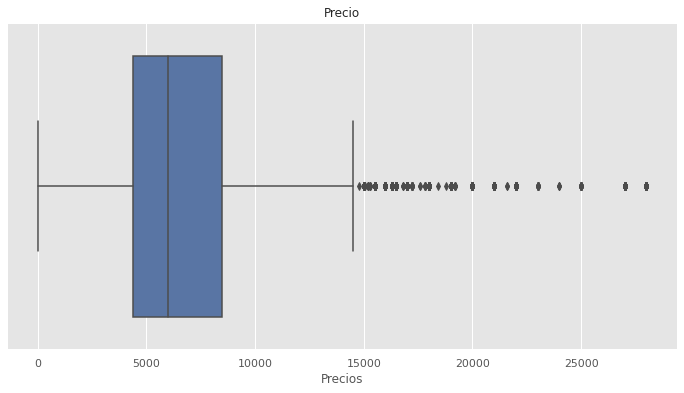

In [99]:
#Boxplot para client_price
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['client_price'])
plt.title('Precio')
plt.xlabel('Precios')
plt.show()

In [100]:
#Análisis particular de la variable "VArticuloTalle_Costo"
variable = 'VArticuloTalle_Costo'

minimo = df[variable].min()
maximo = df[variable].max()
media = df[variable].mean()
mediana = df[variable].median()
moda = df[variable].mode()[0]
stdev = df[variable].std()
varian = df[variable].var()

print('Minimo: ' + str(minimo))
print('Maximo: ' + str(maximo))
print('Media: ' + str(round(media,2)))
print('Mediana: ' + str(mediana))
print('Moda: ' + str(moda))
print('Desviación estándar: ' + str(round(stdev,2)))
print('Varianza: ' + str(round(varian,2)))

Minimo: 0.1
Maximo: 17894.21
Media: 4399.15
Mediana: 3894.2
Moda: 3452.13
Desviación estándar: 2701.96
Varianza: 7300611.33


<Figure size 720x648 with 0 Axes>

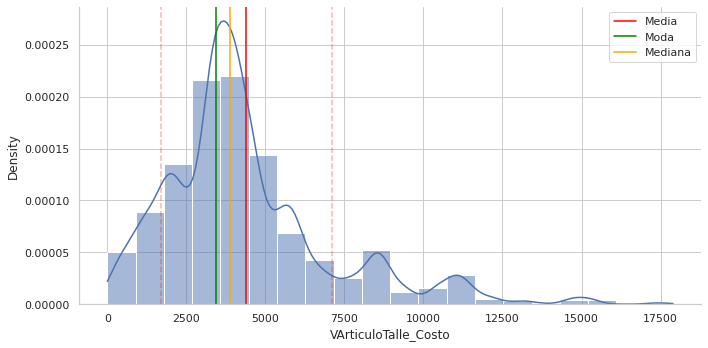

In [101]:
#Histograma y curva de densidad de VArticuloTalle_Costo con media, mediana y moda
plt.figure(figsize=(10, 9))
ax = sns.displot(data=df, 
                 x = variable, 
                 kde=True,
                stat="density",
                height=5,
                aspect=2,
                bins=20)

plt.axvline(media,
           color = "red",
           label = 'Media')

plt.axvline(media - stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(media + stdev,
           color = "red",
           alpha = 0.3,
           linestyle = "--")

plt.axvline(moda,
           color = "green",
           alpha = 1,
           label = 'Moda')

plt.axvline(mediana,
           color = "orange",
           alpha = 1,
           label = 'Mediana')

plt.legend()

plt.show()

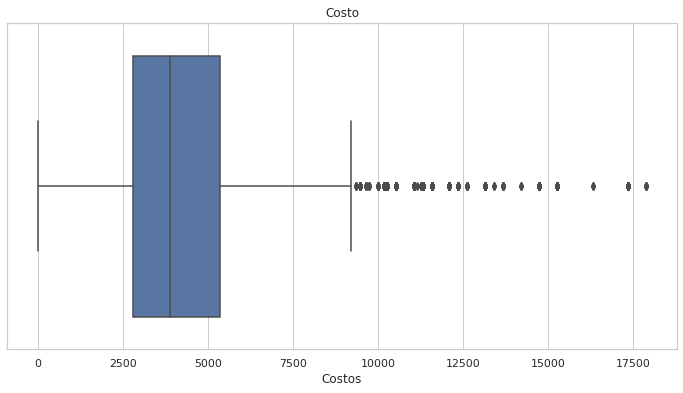

In [102]:
#Boxplot para VArticuloTalle_Costo
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df['VArticuloTalle_Costo'])
plt.title('Costo')
plt.xlabel('Costos')
plt.show()

In [103]:
#Análisis de valores únicos de variables categóricas
cat_columns=['ecommerce', 'store', 'linea', 'marca','vTalle_Codigo','ecomm_transporte_nombre','ColorPrimario','Disciplina','Genero','payment']

for i in cat_columns:
    print(df[i].name)
    print(df[i].unique())

ecommerce
['vtex' 'meli']
store
['Dash' 'Grid' 'Mark' 'Adidas Performance' 'Fila' 'Nike' 'Stadium' 'Puma'
 'Rebook Argentina' 'Umbro' 'Adidas Original']
linea
['INDUMENTARIA        ' 'CALZADO ADULTOS     ' 'CALZADO NIÑOS       '
 'MEDIAS              ' 'ACCESORIOS-REPUESTOS' 'BOLSOS              ' nan]
marca
['ADIDAS FUTBOL       ' 'NIKE                ' 'BESS II             '
 'NIKE ANNEX          ' 'PUMA                ' 'REVES               '
 'ZUMM                ' 'FILA DASS           ' 'JOHN FOOS ARGENTINA '
 'ADIDAS ARGENTINAS   ' 'TOPPER              ' 'SHOTER              '
 'NIKEGOLF            ' 'ATLETIC SERV SA     ' 'NEW ERA             '
 'REEBOK ARGENTINA    ' 'UNDER ARMOUR        ' 'NEW BALANCE         '
 'COMERCIAL AMERICAS  ' 'SUPERFUTBOL         ' 'SPORT COMPLEMENTS   '
 'FLASH               ' 'PROCER              ' 'FOOTY MEILY         '
 'GOORIN              ' 'O´NEILL             ' 'KLALUTEX            '
 'NUEVO EMPORIO       ' 'SOLCI               ' 'FALLEN      

In [104]:
#Normalización de datos de variables categóricas

#linea: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDO"
df['linea'] = df['linea'].str.strip()
df['linea'] = df['linea'].fillna('DESCONOCIDA')

#marca: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDA"
df['marca'] = df['marca'].str.strip()
df['marca'] = df['marca'].fillna('DESCONOCIDA')

#ecomm_transporte_nombre: quitamos espacios y unificamos los que significan lo mismo
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].str.strip()
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].replace(to_replace =["Estándar a domicilio", "Normal a domicilio"], value ="Envio a domicilio Estándar")
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].replace(to_replace =["Transporte interno Essential Meli"], value ="Transporte interno Essential")
df['ecomm_transporte_nombre'] = df['ecomm_transporte_nombre'].replace(to_replace =["Express a domicilio", "Envio-24hs"], value ="Prioritario a domicilio")

#ColorPrimario: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDO"
df['ColorPrimario'] = df['ColorPrimario'].str.strip()
df['ColorPrimario'] = df['ColorPrimario'].fillna('DESCONOCIDO')

#Disciplina: quitamos espacios, reemplazamos NaN por "DESCONOCIDA" y unificamos los que significan lo mismo
df['Disciplina'] = df['Disciplina'].str.strip()
df['Disciplina'] = df['Disciplina'].fillna('DESCONOCIDA')
df['Disciplina'] = df['Disciplina'].replace(to_replace =["TENNIS"], value ="TENIS")

#Genero: quitamos los espacios y reemplazamos los NaN por "DESCONOCIDO"
df['Genero'] = df['Genero'].str.strip()
df['Genero'] = df['Genero'].fillna('DESCONOCIDO')

#payment: unificamos los que significan lo mismo y reemplazamos '\\N' por "Desconocido"
df = df.replace({"creditCard": "credit_card","account_money": "MercadoPago", "\\N":"Desconocido"})


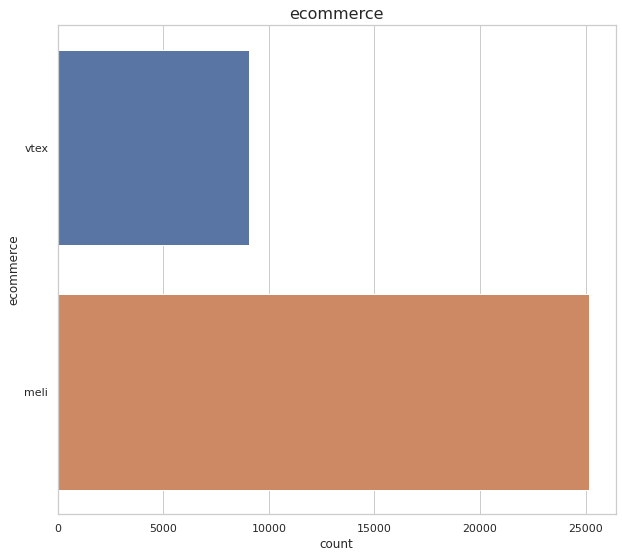

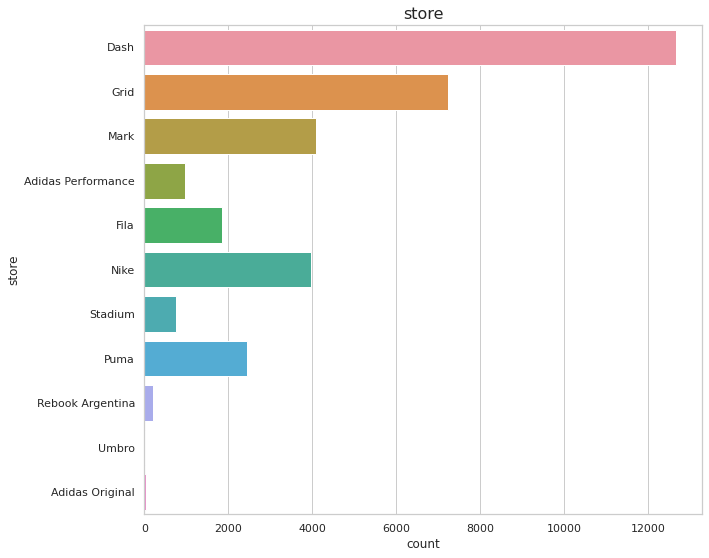

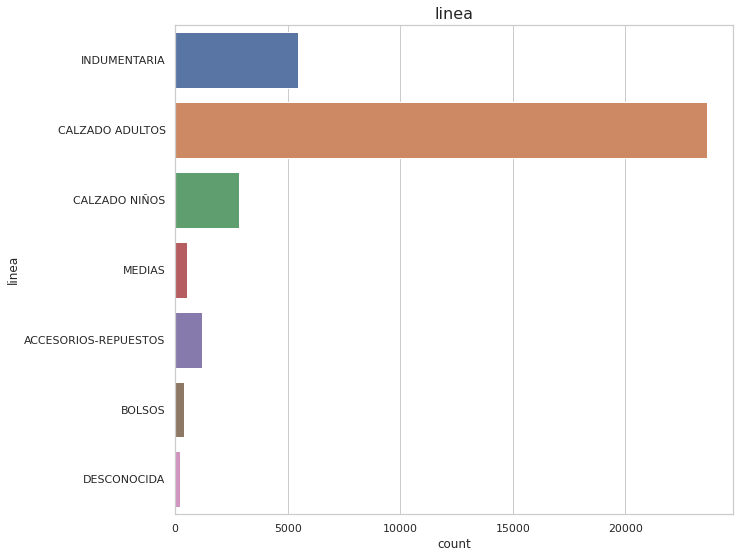

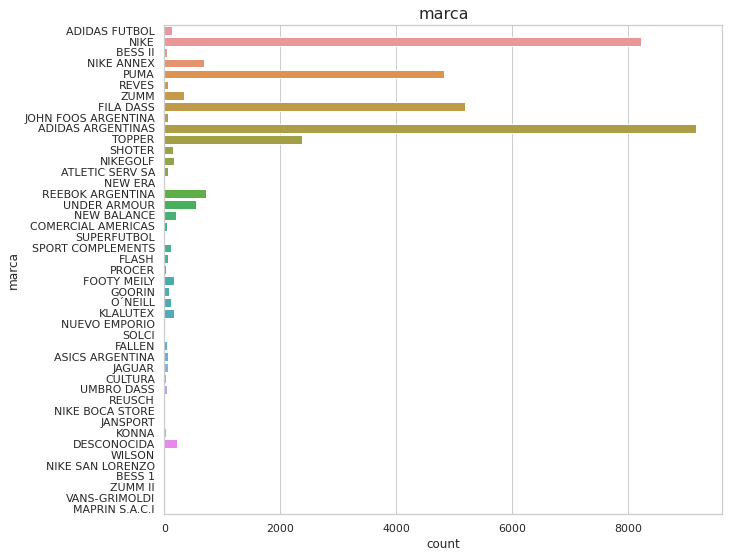

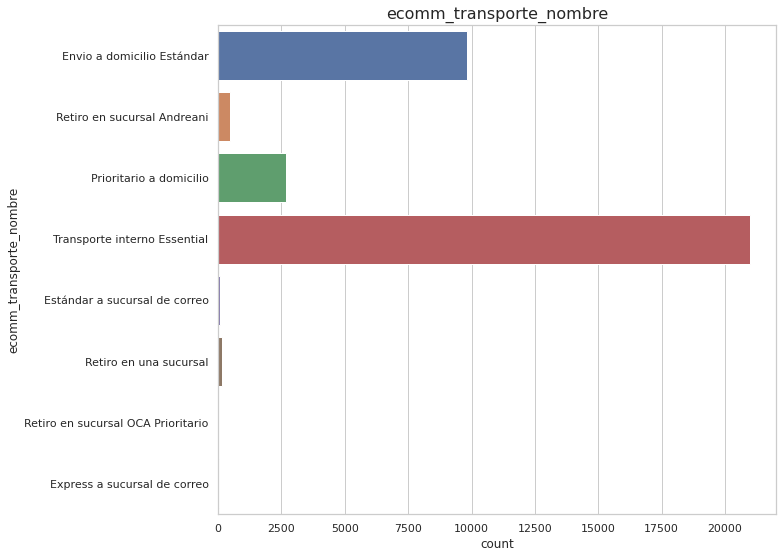

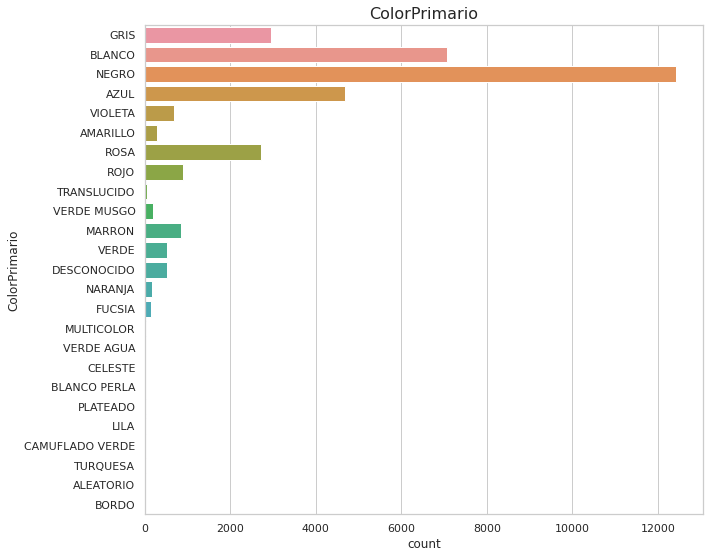

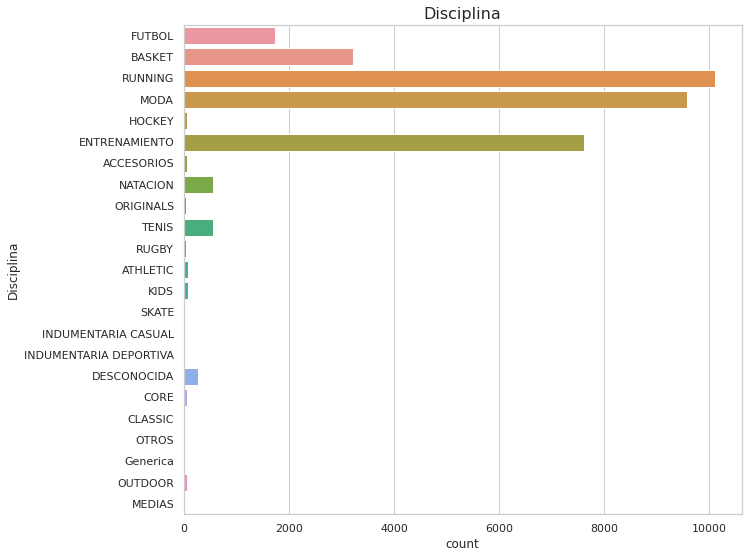

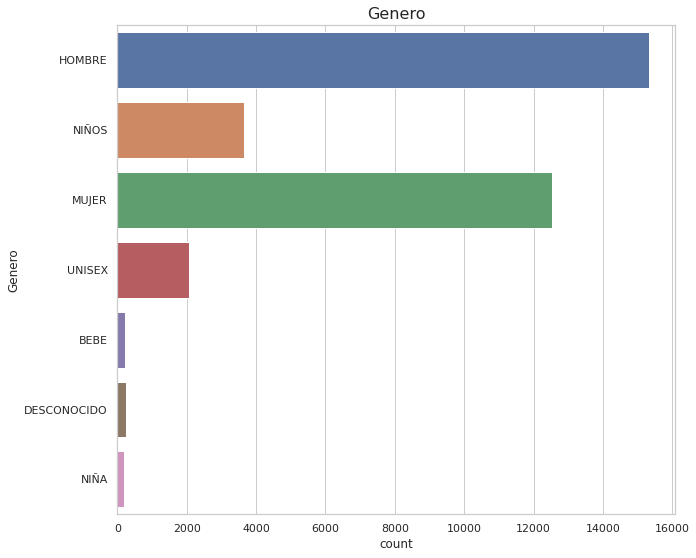

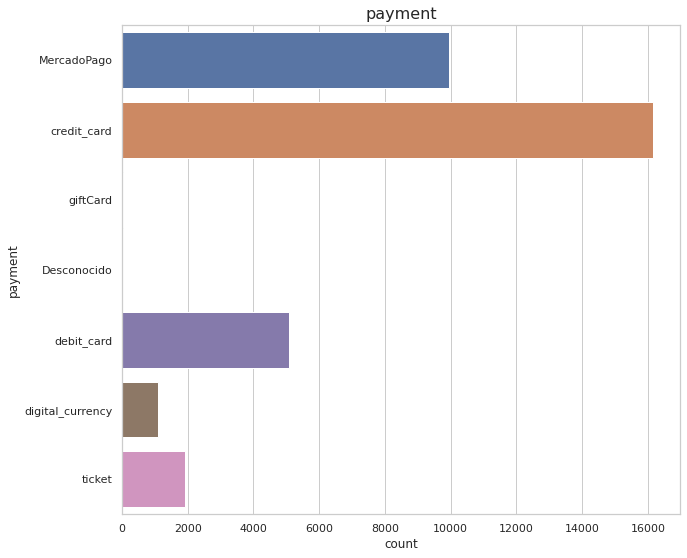

In [106]:
#Análisis de frecuencias de variables categóricas (excepto talle)
cat_columns=['ecommerce', 'store', 'linea', 'marca','ecomm_transporte_nombre','ColorPrimario','Disciplina','Genero','payment']

for i in cat_columns:
    df[i] = df[i].str.rstrip()

for i in cat_columns:
    plt.figure(figsize=(10,9))
    plt.title(i,fontsize=16)
    plt.rcParams['figure.facecolor'] = 'White'
    sns.countplot(y=df[i])
    plt.show()

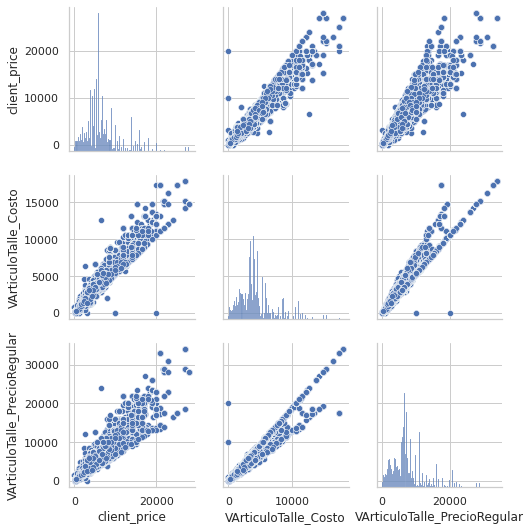

In [107]:
#Scatterplots para ver las relaciones entre todas las variables cuantitativas
sns.pairplot(df[['client_price','VArticuloTalle_Costo','VArticuloTalle_PrecioRegular']])
plt.show()

In [108]:
#Cálculo de la correlación entre variables
df.corr()

,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
quantity,1.000000,-0.028945,-0.033575,-0.030914
client_price,-0.028945,1.000000,0.965684,0.943038
VArticuloTalle_Costo,-0.033575,0.965684,1.000000,0.971062
VArticuloTalle_PrecioRegular,-0.030914,0.943038,0.971062,1.000000


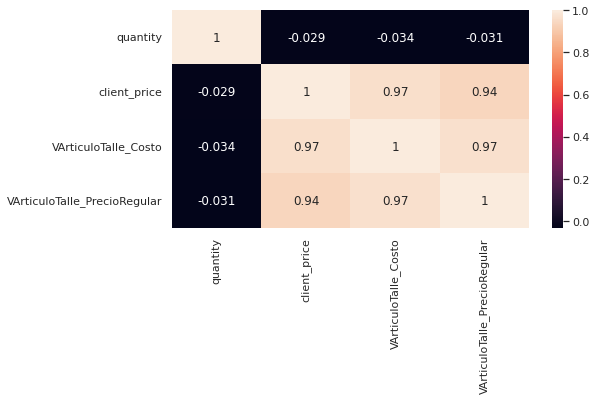

In [109]:
#Heatmap de la correlación
plt.subplots(figsize=(8, 4))
sns.heatmap(df.corr(),annot=True)
plt.show()

En base a los gráficos anteriores se puede notar que todas las variables de precio y costo están altamente correlacionadas positivamente (si una crece la otra también), lo cual tiene sentido ya que la ganancia se genera vendiendo a un precio superior al costo

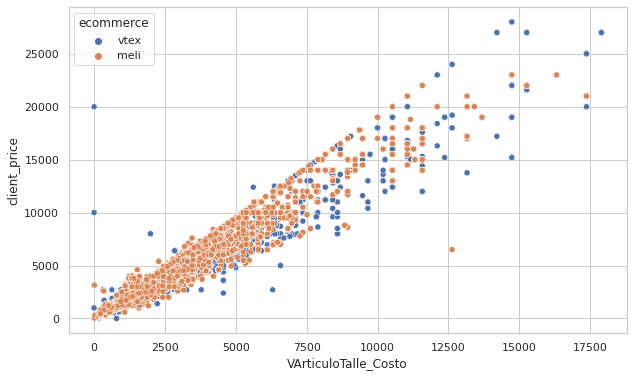

In [110]:
#Analizamos particularmente la relación entre el costo y el precio por ecommerce
plt.subplots(figsize=(10, 6))
sns.scatterplot(x='VArticuloTalle_Costo', y='client_price', hue='ecommerce', data=df)
plt.show()

Se puede notar que:

Para costos similares Meli en general vende a un mayor precio, por lo que es probable que genere mayor ganancia.
Hay algunos casos atípicos a analizar donde el costo es 0 y el artículo se vendió con un precio determinado.
Meli tiene mayor concentración de puntos en precios menores a 10000, por lo que es probable que genere mayor cantidad de ventas de productos en ese rango de precios.

In [111]:
#Agregamos la variable "ganancia" (precio - costo) para analizar algunas cuestiones en base a la misma
df["ganancia"] = df["client_price"] - df["VArticuloTalle_Costo"]
df[['client_price','VArticuloTalle_Costo','ganancia']]

,client_price,VArticuloTalle_Costo,ganancia
0,9999.0,6439.30,3559.70
1,15999.0,8420.53,7578.47
2,19199.2,12631.05,6568.15
3,19199.2,12631.05,6568.15
4,23999.0,12631.05,11367.95
...,...,...,...
34222,459.0,225.60,233.40
34223,4239.0,2228.37,2010.63
34224,3499.0,3101.07,397.93
34225,13999.0,7894.21,6104.79


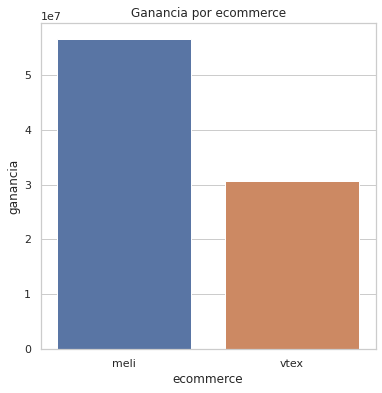

In [112]:
#Vemos cantidad de ventas y ganancia por ecommerce
cat = df[["ecommerce", "ganancia"]].groupby(['ecommerce'], as_index=False).sum().sort_values(by='ganancia', ascending=False)
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.barplot(x='ecommerce', y='ganancia', data=cat)
plt.title('Ganancia por ecommerce')
plt.show()

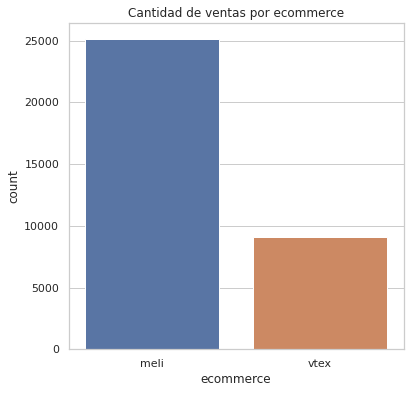

In [113]:
plt.figure(figsize=(6,6))
sns.set_theme(style="whitegrid")
sns.countplot(x = 'ecommerce',
              data = df,
              order = df['ecommerce'].value_counts().index)
plt.title('Cantidad de ventas por ecommerce')
plt.show()

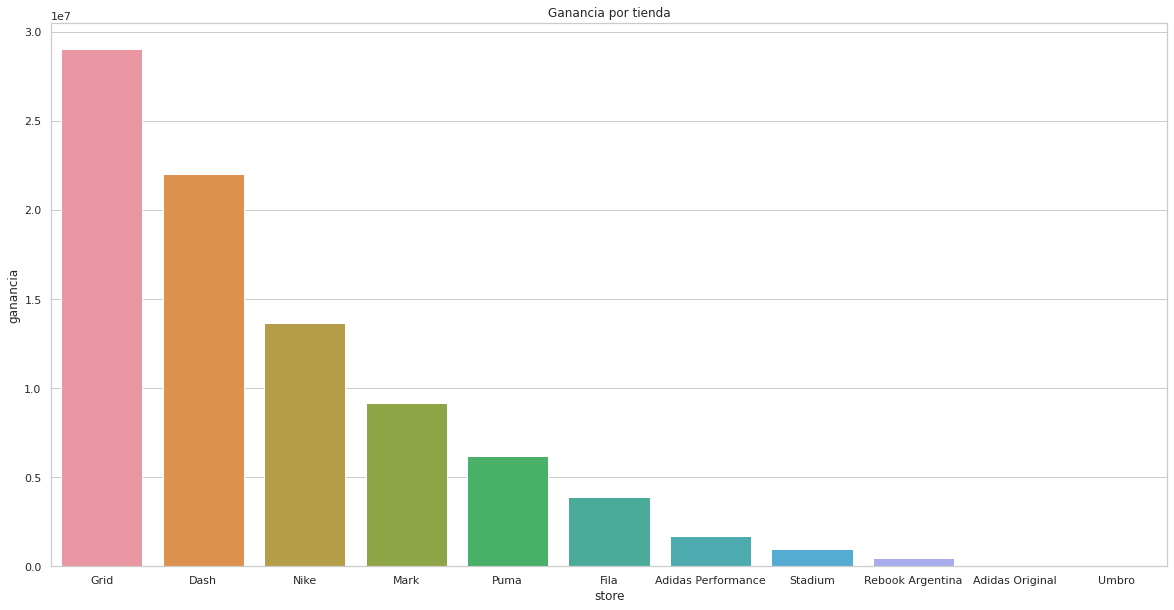

In [114]:
#Analizamos las ganancias por tienda
cat = df[["store", "ganancia"]].groupby(['store'], as_index=False).sum().sort_values(by='ganancia', ascending=False)
plt.figure(figsize=(20,10))
sns.barplot(x='store', y='ganancia', data=cat)
plt.title('Ganancia por tienda')
plt.show()

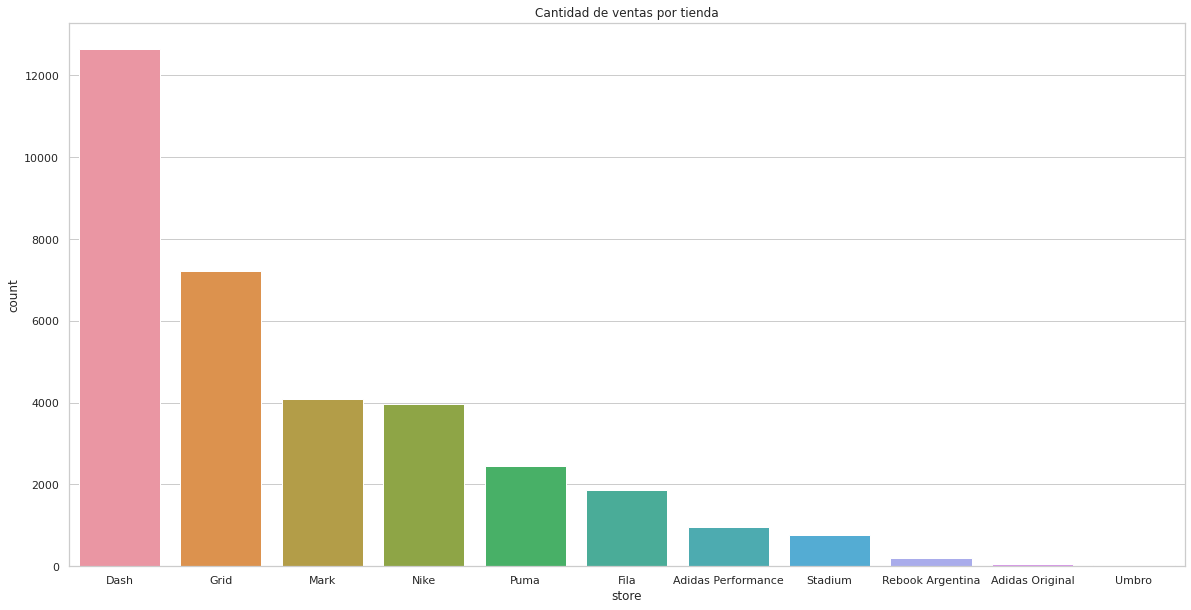

In [115]:
plt.figure(figsize=(20,10))
sns.set_theme(style="whitegrid")
sns.countplot(x = 'store',
              data = df,
              order = df['store'].value_counts().index)
plt.title('Cantidad de ventas por tienda')
plt.show()

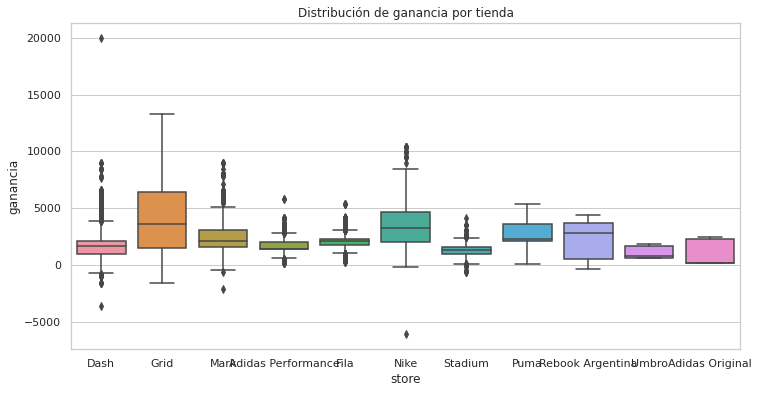

In [116]:
plt.subplots(figsize=(12, 6))
sns.boxplot(x=df['store'], y=df['ganancia'])
plt.title('Distribución de ganancia por tienda')
plt.show()

In [117]:
df[df['ganancia'] < -5000]

,ecomm_order_id,ecommerce,store,ecomm_creation_date_x,linea,marca,vArticulo_id,vTalle_Codigo,producto,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular,ecomm_transporte_nombre,ColorPrimario,ProveedorId,Disciplina,Genero,date_handling,date_invoiced,email,adress_id,latitude,longitude,payment,ganancia
19089,4333678921,meli,Nike,2021-01-29 02:14:59.000,CALZADO ADULTOS,NIKE,306-5639,09 *,Botines Nike Tiempo Legend 8 Pro Fg Hombre,1,6499.0,12631.05,23999.0,Transporte interno Essential,NEGRO,AT6133-004,FUTBOL,HOMBRE,Desconocido,2021-01-29 09:25:49,ttincho.61zfk1r+2-ogqztgmzwg44dsnrx@mail.merca...,Desconocido,Desconocido,Desconocido,digital_currency,-6132.05


Se puede notar que:

La tienda "Grid" es la que mayor ganancia genera.
La segunda que mayor ganancia genera es "Dash", pero de acuerdo al boxplot tiene en promedio ganancias menores a varias de las tiendas y algunos outliers a analizar. También es la que mayor cantidad de ventas tiene.Ambas tienen pérdidas probablemente por las promociones que ofrecen.
"Nike" tiene un caso de pérdida mayor a 5000 que habría que analizar en detalle para ver si corresponde a un error de datos o hubo realmente una venta con esa pérdida.

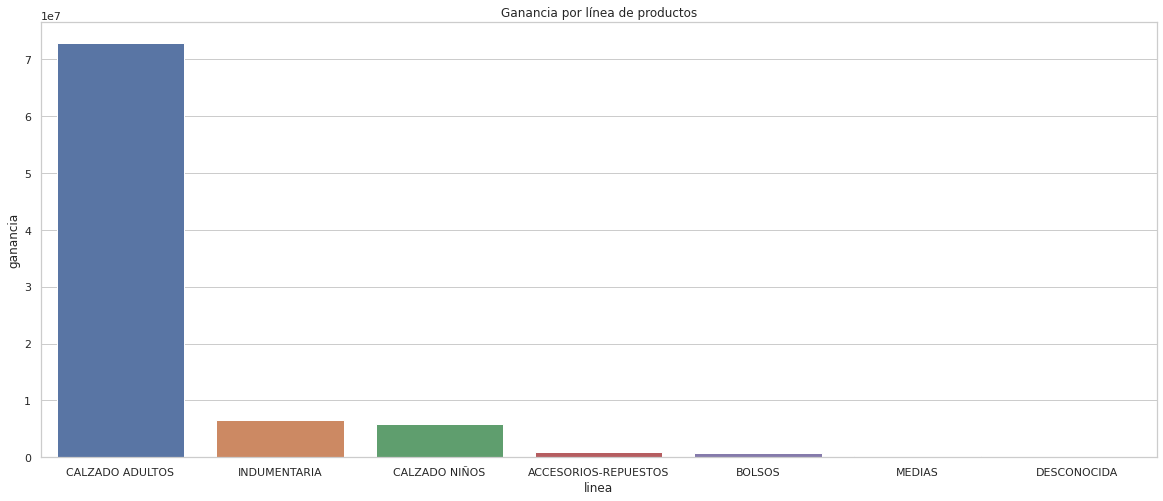

In [123]:
#Analizamos las ganancias por línea de producto
cat = df[["linea", "ganancia"]].groupby(['linea'], as_index=False).sum().sort_values(by='ganancia', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='linea', y='ganancia', data=cat)
plt.title('Ganancia por línea de productos')
plt.show()

In [124]:
#Análisis de ventas género vs tienda
pd.crosstab(df.Genero, df.store, normalize='columns')

store,Adidas Original,Adidas Performance,Dash,Fila,Grid,Mark,Nike,Puma,Rebook Argentina,Stadium,Umbro
Genero,,,,,,,,,,,
BEBE,0.000000,0.003122,0.006716,0.000000,0.005121,0.003923,0.012106,0.008167,0.000000,0.000000,0.00
DESCONOCIDO,0.000000,0.005203,0.014142,0.000000,0.002215,0.007357,0.000504,0.005308,0.000000,0.001323,0.04
HOMBRE,0.333333,0.186264,0.385320,0.413032,0.535502,0.574056,0.395712,0.554512,0.560386,0.293651,0.40
MUJER,0.666667,0.678460,0.375918,0.530964,0.261592,0.287396,0.412106,0.385872,0.405797,0.502646,0.00
NIÑA,0.000000,0.000000,0.009086,0.000000,0.000554,0.002697,0.012106,0.002042,0.000000,0.007937,0.00
NIÑOS,0.000000,0.071800,0.138105,0.049542,0.117924,0.055665,0.117276,0.034300,0.014493,0.128307,0.48
UNISEX,0.000000,0.055151,0.070712,0.006462,0.077093,0.068906,0.050189,0.009800,0.019324,0.066138,0.08


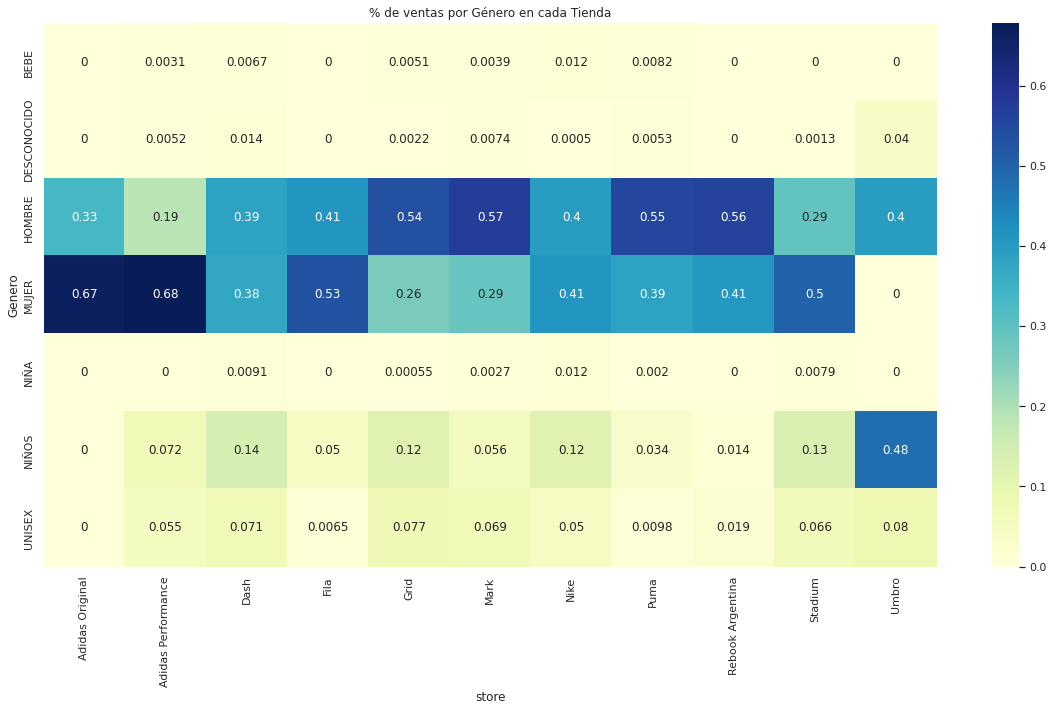

In [125]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df.Genero, df.store, normalize='columns'),
            cmap="YlGnBu", annot=True)
plt.title('% de ventas por Género en cada Tienda')
plt.show()

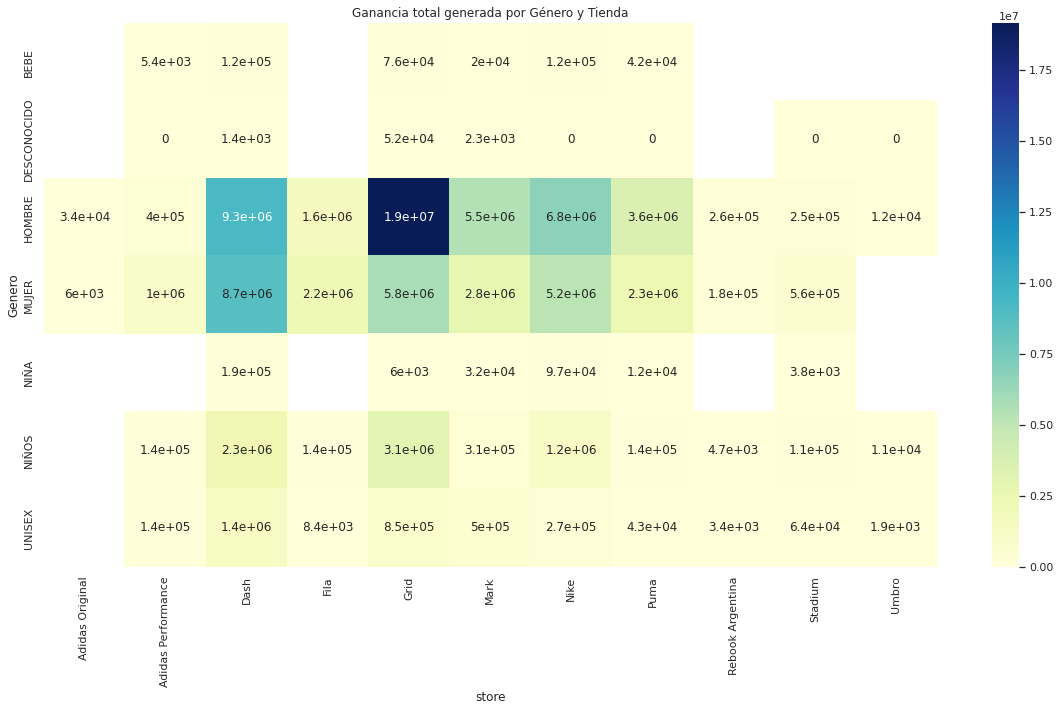

In [126]:
plt.figure(figsize=(20,10))
sns.heatmap(pd.crosstab(df.Genero, df.store, values=df.ganancia, aggfunc='sum').round(0),cmap="YlGnBu", annot=True)
plt.title('Ganancia total generada por Género y Tienda')
plt.show()

Se puede notar que:

Casi todas las tiendas venden mayoritariamente productos para hombre y mujer, a excepción de "Umbro" que tiene un 50% de ventas en productos para niños.
La mayor ganancia la genera la tienda "Grid" con artículos para hombres, seguida de "Dash" con artículos para hombres y mujeres.

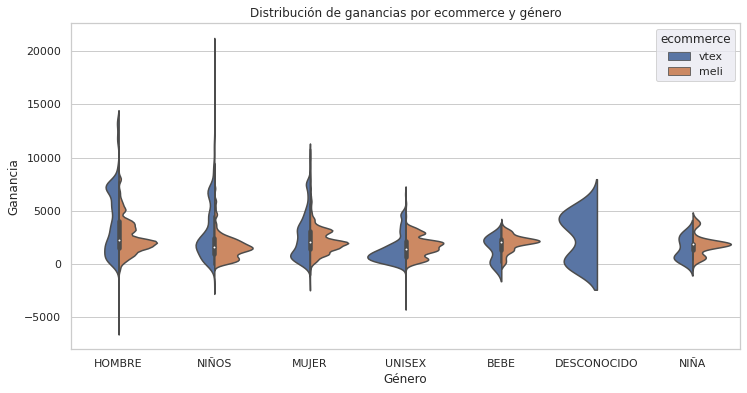

In [127]:
#Distribución de ganancias por ecommerce y género
fig, ax = plt.subplots(figsize=(12, 6))
sns.set()
ax = sns.violinplot(x='Genero', y='ganancia', hue='ecommerce',data=df, split=True)
ax.set(ylabel='Ganancia', xlabel='Género', title='Distribución de ganancias por ecommerce y género')
plt.show()

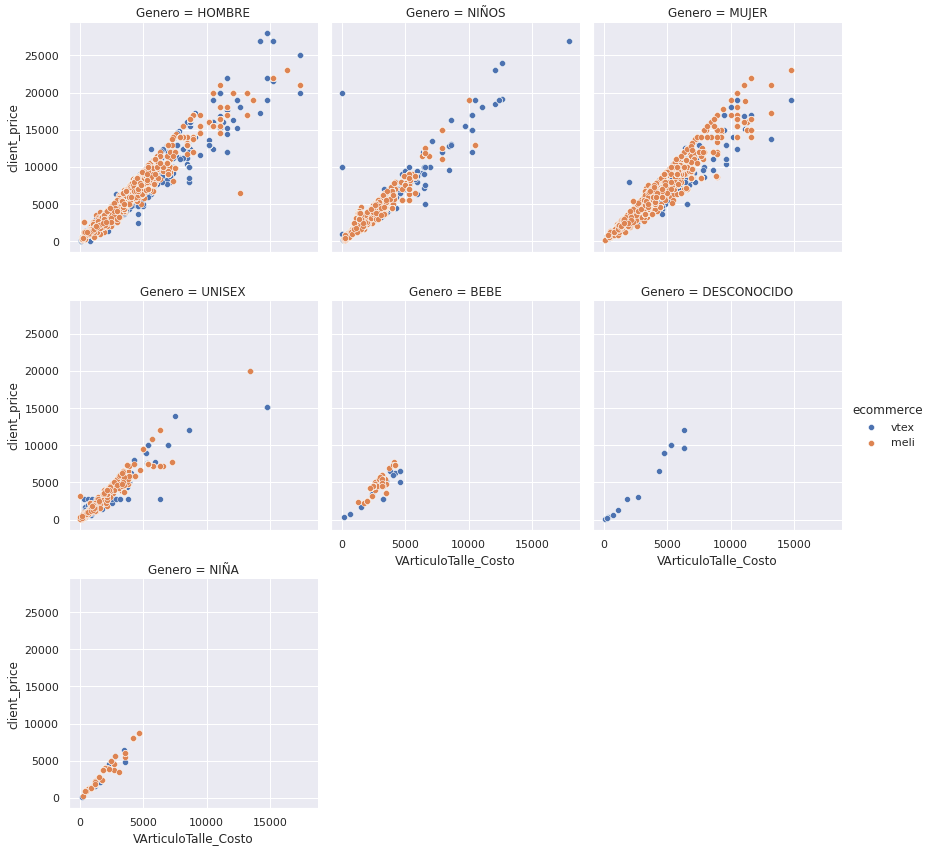

In [128]:
#Scatterplot precio y costo dividido por cada género y por ecommerce 
g = sns.FacetGrid(df, col="Genero",  hue="ecommerce", height=4, col_wrap=3)
g.map(sns.scatterplot, "VArticuloTalle_Costo", "client_price")
g.add_legend()
plt.show()

In [130]:
#Análisis de cantidad vendida y ganancia por disciplina
df_disciplina = pd.DataFrame(df.groupby('Disciplina').sum())[['quantity', 'ganancia']]
df_disciplina

,quantity,ganancia
Disciplina,,
ACCESORIOS,57,3.583701e+04
ATHLETIC,102,5.211876e+04
BASKET,3250,2.062879e+07
CLASSIC,38,1.983524e+04
CORE,59,1.651606e+05
DESCONOCIDA,273,5.957523e+04
ENTRENAMIENTO,7719,1.324296e+07
FUTBOL,1864,2.652687e+06
Generica,14,5.717890e+03


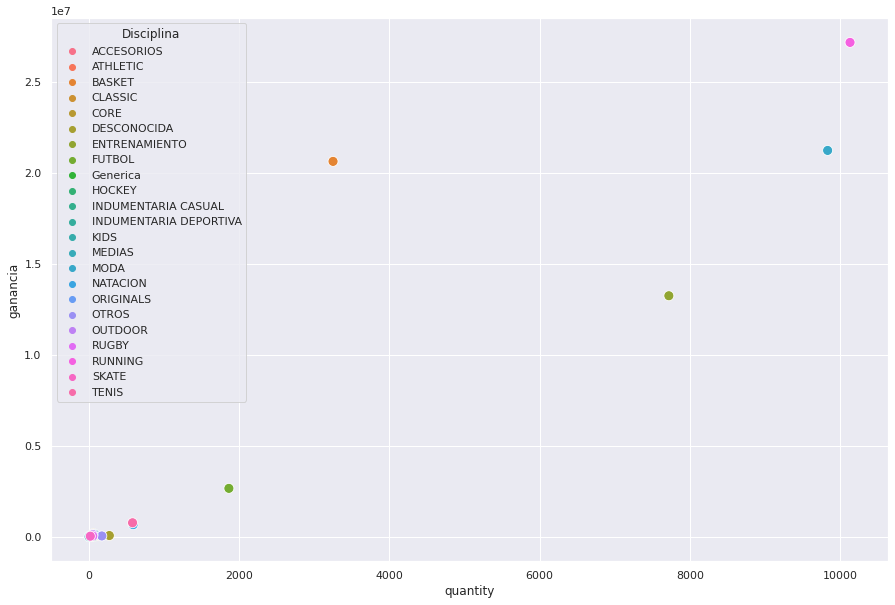

In [131]:
plt.subplots(figsize=(15, 10))
sns.scatterplot(x='quantity', y='ganancia', hue=df_disciplina.index, data=df_disciplina, s=100)
plt.show()

In [132]:
#Análisis de componentes principales para cada disciplina usando las variables cuantitativas
df_store = pd.DataFrame(df.groupby('Disciplina').sum())[['quantity','client_price','VArticuloTalle_Costo','VArticuloTalle_PrecioRegular']]
df_store

,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
Disciplina,,,,
ACCESORIOS,57,74845.90,3.900889e+04,89361.0
ATHLETIC,102,180704.40,1.285856e+05,202943.0
BASKET,3250,50570362.70,2.994158e+07,55786226.9
CLASSIC,38,64341.60,4.450636e+04,80648.0
CORE,59,430671.75,2.655112e+05,383841.0
DESCONOCIDA,273,1636179.00,6.604177e+04,112877.0
ENTRENAMIENTO,7719,37784159.80,2.454120e+07,44217108.9
FUTBOL,1864,7366256.82,4.714779e+06,7759517.6
Generica,14,22190.00,1.647211e+04,30820.0


In [133]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_store)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']
pca_pipe.fit(df_store)

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_store.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4']
)

,quantity,client_price,VArticuloTalle_Costo,VArticuloTalle_PrecioRegular
PC1,0.489748,0.502991,0.504108,0.503013
PC2,-0.868882,0.317460,0.214816,0.313238
PC3,0.018866,-0.560529,-0.247413,0.790087
PC4,0.069542,0.576217,-0.799072,0.156912


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[9.79966260e-01 1.98049402e-02 1.63058109e-04 6.57421991e-05]


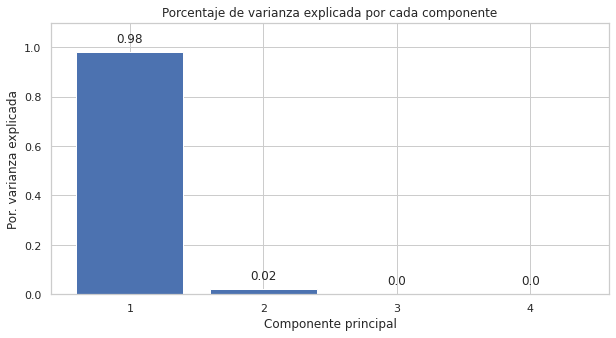

In [134]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)
import seaborn as sns
sns.set_style("whitegrid")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_store.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [135]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X=df_store)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4'],
    index   = df_store.index
)
proyecciones

,PC1,PC2,PC3,PC4
Disciplina,,,,
ACCESORIOS,-0.949031,0.009797,0.001625,-0.002948
ATHLETIC,-0.933734,0.001628,0.001283,-0.003614
BASKET,3.014416,1.059596,0.010000,0.030961
CLASSIC,-0.952262,0.014948,0.001394,-0.004035
CORE,-0.925827,0.021911,-0.001973,-0.004740
DESCONOCIDA,-0.876943,-0.027109,-0.037356,0.042195
ENTRENAMIENTO,2.979504,-0.620022,0.084537,0.030270
FUTBOL,-0.158393,-0.215639,-0.007791,0.008748
Generica,-0.959130,0.019967,0.001203,-0.004384


Text(0, 0.5, 'PC2')

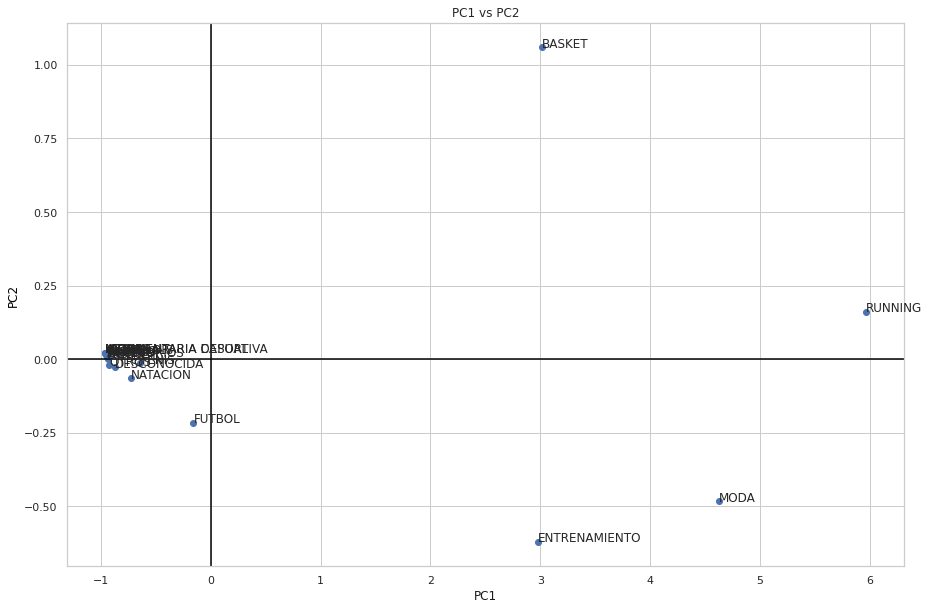

In [136]:
#Graficamos PC1 vs PC2 para ver relación entre disciplinas
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
proyecciones['val']=proyecciones.index

ax = proyecciones.set_index('PC1')['PC2'].plot(style='o')

def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['val']))

label_point(proyecciones.PC1, proyecciones.PC2, proyecciones.val, ax)
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')